# Problem 1: Bayes theorem.

Not everyone who has high blood sugar has diabetes. Suppose the prior probability of having diabetes in the general population is 0.1. The probability of having high blood sugar given that someone has diabetes is 0.8. The probability of having high blood sugar is 0.4. What is the probability that some has diabetes, given that they have high blood sugar?


In [3]:
#your answer here

# Given probabilities

P_D = 0.1         # P(D)
P_H_given_D = 0.8 # P(H | D)
P_H = 0.4         # P(H)

P_D_given_H = (P_H_given_D * P_D) / P_H

P_D_given_H


0.20000000000000004

# Problem 2: 

Which of the following statements are true about the LDA classifier, choose all that apply.

1. The LDA classifier has linear decision boundaries
2. The LDA classifier assumes that the features have a joint normal distribution
3. The LDA classifier assumes that the features are independent
4. The LDA classifier assumes that the covariance matrix of the features for each class is the same.


# your answer here
1. True – LDA assumes equal covariance matrices, resulting in linear boundaries.
2. True – LDA models features as a multivariate normal distribution within each class.
3. False – LDA allows correlated features; independence is not assumed.
4. True – LDA assumes all classes share the same covariance matrix.

# Problem 3:
Which of the following statmetns are true about QDA classifier, choose all that apply

1. QDA is based on the bayes decision rule
2. QDA assumes that the covariance matrix of the features is same for each class
3. QDA assumes that the features have a joint normal distribution

# your answer here
1. True – QDA uses Bayes decision theory to assign class labels based on posterior probabilities.
2. False – QDA allows each class to have its own covariance matrix.
3. True – QDA models each class with a multivariate normal distribution. 

# Problem 4: A simple Spam classifier using Naive Bayes

The chances of seeing the phrase `"Avoid bankruptcy"` and `"Billion Dollars"` in a spam email are $0.8$ and $0.9$ respectively.

The chances of a random email being spam is $0.1$

The chances of joinylt seeing the phrases `"Avoid bankrupty"` and `"Billion Dollars"` in a random email is $0.09$

Given that an email contains `'Avoid bankrupty'` and `"Billion Dollars"`, what is the probability that it is a spam email?

**Hint**: 

Apply the bayes theorem on `P(Spam | "avoid bankrupty", "Billion Dollars")`. 

Next assume the naive bayes model, i.e. if we have two features $A$ and $B$, then P(A,B | spam) = P(A|spam)*P(B|spam)
    

In [5]:

P_A_given_spam = 0.8          # P("Avoid bankruptcy" | Spam)
P_B_given_spam = 0.9          # P("Billion Dollars" | Spam)
P_spam = 0.1                  # P(Spam)
P_A_and_B = 0.09              # P("Avoid bankruptcy" and "Billion Dollars")

# Naive Bayes assumption: P(A, B | Spam) = P(A|Spam) * P(B|Spam)
P_A_and_B_given_spam = P_A_given_spam * P_B_given_spam

# Apply Bayes' Theorem
P_spam_given_A_and_B = (P_A_and_B_given_spam * P_spam) / P_A_and_B

P_spam_given_A_and_B


0.8000000000000002

# Problem 5:
Which of the following statements are true in the context of generative and predictive models for classification?

A. In a generative model, we model the probability distribution of features given the outcome, i.e. $P(x_1, \ldots, x_p | y)$ and then use Bayes theorem to compute $P(y | x_1, \ldots, x_p)$.

B: In a predictive model, we \emph{directly} model the probability distribution of the outcome given the features, e.g. $P(y| x_1, \ldots x_p)$.

C: In a generative model, we need to make assumptions about the features, e.g. either they are independent, or they jointly follow a normal distribution.

D: All of the above

In [ ]:
D!

# Problem 6:
In this problem we will build a bunch of classifier for the wine dataset.

The wine dataset is actually a classification problem, where the outcome is a wine quality that can be a number from 1 to 8. In previous homeworks, we treated this outcome as a continuous variable and used regression for predicting the quality. 

Here we will treat the outcome as a categorical variable and use multiclass classification for prediction.

In the lab we saw how to use a LDA and QDA to estimate a multi class classification model. But we cannot use metrics like true positive rate, false positive rate when there are more than 2 classes, as these metrics make sense only when there is a positive class and a negative class. 

In multi class classification, we typically define one class as the positive class and all the other classes become negative class. In the cells below, we will create three different rating classes for wine, and run binary classification using this idea of treating one class as positive and the rest as negative.


First lets import the dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Now, lets count the proportion of samples in category of the outcome variable "quality"

In [64]:
wine.quality.value_counts(normalize=True).sort_index()

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: proportion, dtype: float64

In [ ]:
# If we treat each quality as a separate class, we will have 7 different classes. 
# Instead, we will group the classes into a new variable as follows. 
# We will create a new rating variable by combining the quality levels into groups.
# Let us group the ratings 3,4 as "C", 5,6 as "B" and 7,8 as "A"

In [66]:
mapping = {8: 'A', 7:'A', 6:'B', 5:'B', 4:'C', 3:'C'}

wine['rating'] = wine.quality.map(mapping)

In [68]:
# lets check if this variable was added to the dataframe
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,B
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,B
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,B


In [72]:
# find the proportion of each rating A,B,C
wine.rating.value_counts(normalize = True).sort_index()

rating
A    0.135710
B    0.824891
C    0.039400
Name: proportion, dtype: float64

Suppose we want to build a model to differentiate wines in class $A$ with classes $B$ and $C$. 

We will treat $A$ as the positive class, and $B$ and $C$ together will be the negative class

In [ ]:
#Create a dummy variable for the categories A, B and C
#Hint: use the get_dummies function  
#Refer to the Week 4 Lab on logistic regression on how to create and concatenate dummy variables.

In [74]:
dummies = pd.get_dummies(wine['rating'], prefix='rating')
wine = pd.concat([wine, dummies], axis=1)

In [ ]:
# Concatenate the dummies dataset with the wine dataset to create a new dataframe
# Hint: Refer to the Week 4 Lab on logistic regression on how to create and concatenate dummy variables.

In [76]:
wine = pd.concat([wine, dummies], axis=1)

In [ ]:
# Find the proportion of wines with rating "A" by using the dummy variable for rating A.

In [78]:
wine['rating_A'].mean()

rating_A    0.13571
rating_A    0.13571
dtype: float64

In [ ]:
#Now our goal is to classify wines in class A vs wines that are not in class A

# So we use the dummy variable for $A$ as the outcome variable and fit a KNN classifier for $k=10$

# You can use the features ''volatile acidity','alcohol','sulphates'' for prediction

In [ ]:
#Hint:  Fitting a knn classifier is exactly the same as fitting the knn regression, 
#you just use the KNeighborsClassifier function instead of the KNeighborsRegression function.

In [ ]:
#Step 1: Create the X and y arrays

In [190]:
dummies = pd.get_dummies(wine['rating'], prefix='rating')
wine = pd.concat([wine, dummies], axis=1)
y = wine['rating_A']
wine.drop(columns=['rating_B', 'rating_C'], inplace=True)
wine = wine.loc[:, ~wine.columns.duplicated()]
wine['rating_A'] = wine['rating_A'].astype(int)
print(wine.columns)
wine['rating_A'].head()
wine['rating_A'].sum()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'rating', 'rating_A'],
      dtype='object')


217

In [192]:
X = wine[['volatile acidity', 'alcohol', 'sulphates']]
y = wine['rating_A']

In [136]:
# Step 2: Import the needed libraries (This has been done for you)

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
# Step 3: Create the kfold object with 5 splits

In [196]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [144]:
# Step 4: Use cross_val_predict to get the predictions of KK classifier with 10 neighbors. 
# Remember to use the KNeighborsClassifier function to define a KNN classifier

In [198]:
knn = KNeighborsClassifier(n_neighbors=10)
y_pred = cross_val_predict(knn, X, y, cv=kf)

In [148]:
# Step 5: Get and plot the confusion matrix

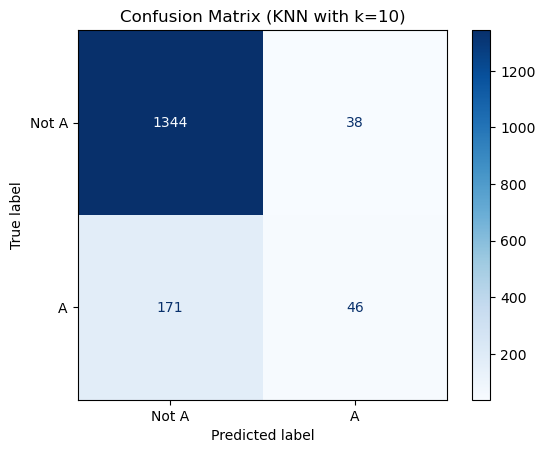

In [200]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not A', 'A'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (KNN with k=10)")
plt.grid(False)
plt.show()

In [202]:
# How good is the classifier in identifying the A grade wines? 
#(Hint: What is the recall?)
# You may use the function below:

from sklearn.metrics import classification_report

print(classification_report(y, y_pred, target_names=['Not A', 'A']))

              precision    recall  f1-score   support

       Not A       0.89      0.97      0.93      1382
           A       0.55      0.21      0.31       217

    accuracy                           0.87      1599
   macro avg       0.72      0.59      0.62      1599
weighted avg       0.84      0.87      0.84      1599



In [206]:
def fpr_tpr_pr(cm):
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    FPR = FP/(FP+TN)
    TPR = TP/(TP+FN)
    precision = TP/(TP + FP)
    print("The false positive rate is", round(FPR,2))
    print("The true positive rate is", round(TPR,2))
    print("The precision is", round(precision,2))

In [ ]:
# Now using the same features, build a model for predicting the wines with rating "B".
# How good is this classifier in identifying 'B' grade wines?

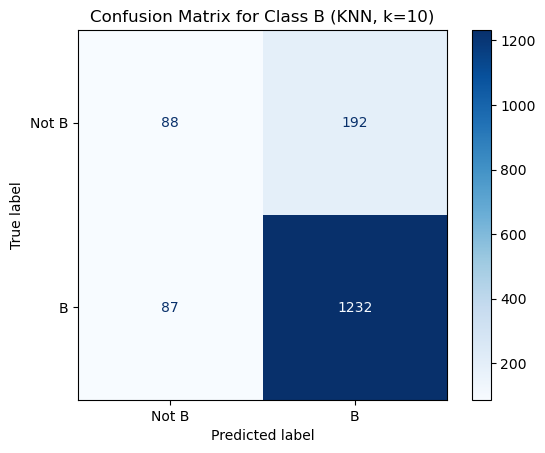

              precision    recall  f1-score   support

       Not B       0.50      0.31      0.39       280
           B       0.87      0.93      0.90      1319

    accuracy                           0.83      1599
   macro avg       0.68      0.62      0.64      1599
weighted avg       0.80      0.83      0.81      1599



In [208]:
    from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

wine['rating_B'] = (wine['rating'] == 'B').astype(int)
X = wine[['volatile acidity', 'alcohol', 'sulphates']]
y = wine['rating_B']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10)
y_pred = cross_val_predict(knn, X, y, cv=kf)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not B', 'B'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Class B (KNN, k=10)")
plt.grid(False)
plt.show()

print(classification_report(y, y_pred, target_names=['Not B', 'B']))

In [ ]:
# Now build a LDA and QDA classifier for predicting wines with rating "A". 


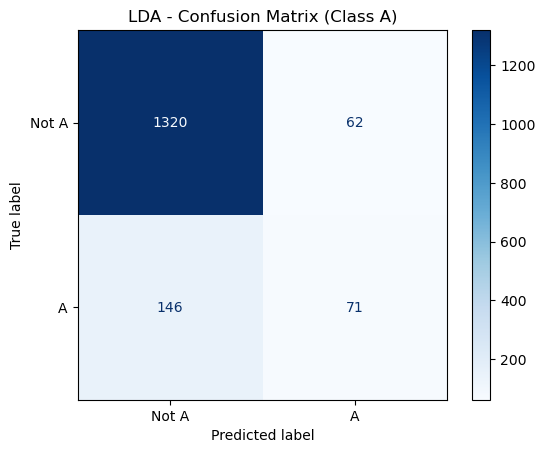

LDA Classification Report
              precision    recall  f1-score   support

       Not A       0.90      0.96      0.93      1382
           A       0.53      0.33      0.41       217

    accuracy                           0.87      1599
   macro avg       0.72      0.64      0.67      1599
weighted avg       0.85      0.87      0.86      1599



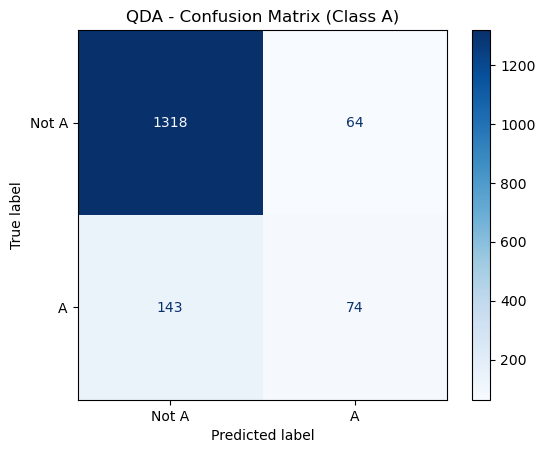

QDA Classification Report
              precision    recall  f1-score   support

       Not A       0.90      0.95      0.93      1382
           A       0.54      0.34      0.42       217

    accuracy                           0.87      1599
   macro avg       0.72      0.65      0.67      1599
weighted avg       0.85      0.87      0.86      1599



In [212]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

wine['rating_A'] = (wine['rating'] == 'A').astype(int)
X = wine[['volatile acidity', 'alcohol', 'sulphates']]
y = wine['rating_A']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lda = LinearDiscriminantAnalysis()
y_pred_lda = cross_val_predict(lda, X, y, cv=kf)

qda = QuadraticDiscriminantAnalysis()
y_pred_qda = cross_val_predict(qda, X, y, cv=kf)

cm_lda = confusion_matrix(y, y_pred_lda)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=['Not A', 'A'])
disp_lda.plot(cmap='Blues')
plt.title("LDA - Confusion Matrix (Class A)")
plt.grid(False)
plt.show()

print("LDA Classification Report")
print(classification_report(y, y_pred_lda, target_names=['Not A', 'A']))

cm_qda = confusion_matrix(y, y_pred_qda)
disp_qda = ConfusionMatrixDisplay(confusion_matrix=cm_qda, display_labels=['Not A', 'A'])
disp_qda.plot(cmap='Blues')
plt.title("QDA - Confusion Matrix (Class A)")
plt.grid(False)
plt.show()

print("QDA Classification Report")
print(classification_report(y, y_pred_qda, target_names=['Not A', 'A']))

In [ ]:
# Compute the precision and recall for the LDA, QDA and KNN classifier for predicting wines with rating "A". 
# Which model would you choose out of the three?

In [216]:
from sklearn.metrics import precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, KFold

wine['rating_A'] = (wine['rating'] == 'A').astype(int)
X = wine[['volatile acidity', 'alcohol', 'sulphates']]
y = wine['rating_A']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=10)

y_pred_lda = cross_val_predict(lda, X, y, cv=kf)
y_pred_qda = cross_val_predict(qda, X, y, cv=kf)
y_pred_knn = cross_val_predict(knn, X, y, cv=kf)

prec_lda = precision_score(y, y_pred_lda)
recall_lda = recall_score(y, y_pred_lda)

prec_qda = precision_score(y, y_pred_qda)
recall_qda = recall_score(y, y_pred_qda)

prec_knn = precision_score(y, y_pred_knn)
recall_knn = recall_score(y, y_pred_knn)

print(f"LDA     → Precision: {prec_lda:.3f}, Recall: {recall_lda:.3f}")
print(f"QDA     → Precision: {prec_qda:.3f}, Recall: {recall_qda:.3f}")
print(f"KNN     → Precision: {prec_knn:.3f}, Recall: {recall_knn:.3f}")

LDA     → Precision: 0.534, Recall: 0.327
QDA     → Precision: 0.536, Recall: 0.341
KNN     → Precision: 0.548, Recall: 0.212
